In [8]:
from sklearn.datasets import make_regression

In [98]:
datax,datay = make_regression(n_features = 1 , n_samples = 5000,noise = 18)
x = datax.reshape((-1,))
y = datay.reshape((-1,))
x = (datax - datax.mean())/datax.std()

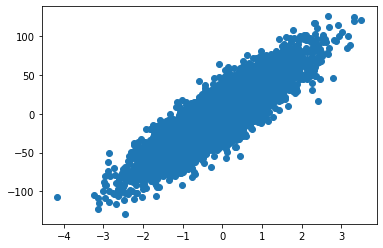

In [104]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [109]:
def hypothesis(x,theta):
    return theta[0] + x*theta[1]

def error(X,Y,theta):
    e = 0;
    for i in range(X.shape[0]):
        e += (hypothesis(X[i],theta) - Y[i])**2
    return e/2


def gradient(X,Y,theta):
    grad = np.zeros((2,))
    for i in range(X.shape[0]):
        grad[0] += (hypothesis(X[i],theta) - Y[i])
        grad[1] += (hypothesis(X[i],theta) - Y[i])*X[i]
    return grad*0.5

def batch_gradient(X,Y,theta,batch_size = 100):
    batch_grad = np.zeros((2,))
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    for i in indices:
        batch_grad[0] = (hypothesis(X[i],theta) - Y[i])
        batch_grad[1] = (hypothesis(X[i],theta) - Y[i])*X[i]
    return batch_grad*0.5

def gradient_descent(X,Y,learning_rate = 0.01):
    theta_batch = np.zeros((2,))
    theta = np.zeros((2,))
    itr = 0
    while(itr<150):
        gradient_batch = batch_gradient(X,Y,theta)
        theta_batch = theta_batch - learning_rate*gradient_batch
        gradien = gradient(X,Y,theta)
        theta = theta - learning_rate*gradien
        itr+=1
    return theta,theta_batch

In [110]:
final_theta,final_theta_batch = gradient_descent(x,y)

In [111]:
final_theta,final_theta_batch

(array([-1.77860754e+206, -3.55517150e+208]),
 array([-8.55412448e+204, -1.01593158e+205]))

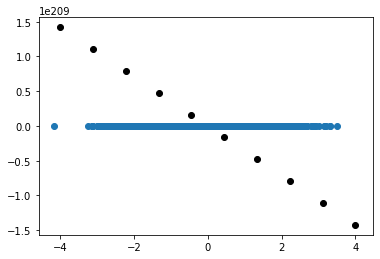

In [112]:
def printgraph(theta):
    xpts = np.linspace(-4,4,10)
    ypts = hypothesis(xpts,theta)
    
    plt.scatter(x,y)
    plt.scatter(xpts,ypts,color = 'black')
    
printgraph(final_theta)